<a href="https://colab.research.google.com/github/Harallambos/AI/blob/main/CTDETECT_ML_CYBER_THREAD_DETECTOR_MACHILE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CTDETECT
# CYBER THREAT DETECTION MODEL USING MACHINE LEARNING



## MSc Advanced Computing Technologies - Birckbek University of London

<br>Name: <b>Harallambos Dallas</b> 
<br>Student Number: <b>13191669</b> 
<br>username: <b>hdalla02</b> 
<br>student se-mail: <b>hdalla02@student.bbk.ac.uk</b>
<br>personal e-mail: <b>xaralambos.dallas@gmail.com</b>

<br><b>Assesment for Applied Machine Learning Module 2020 - 2021 Cyber_Threat_Detection_Model</b>
<br>
<br>
<br>
<br>

### TARGET OF THE PROJECT

We are going to train a model using machine learning techniques which will be able to detect threads/attacs. We will use supervised learning to train this module as we will train it by using dataset called "The Aegean WiFi Intrusion/threat Dataset (AWID)". A standard set of data to be audited, which includes real traces of both normal and intrusive 802.11 traffic with a wide variety of cyber threats/intrusions simulated in a physical lab which realistically emulates a typical SOHO infrastructure, was provided. Details of the dataset can be found in the page below. http://icsdweb.aegean.gr/awid/draft-Intrusion-Detection-in-802-11-Networks-EmpiricalEvaluation-of-Threats-and-a-Public-Dataset.pdf

AWID dataset categorises the attacks according to the methodology of execution. Attacks that have similar patterns of expression fall under one of the groups: a. injection attacks, b. flooding attacks, c. impersonation attacks, d. passive attacks. We will use the reduced CLS portion of the AWID dataset because it serves as a useful starting point for preliminary research, and affords a baseline against which the new built models can be compared with the state-of-the-art Deep Feature Extraction and Selection (DFES) method2 , and other methods using the same reduced CLS portion.

Although flooding and injection attack signatures are also available within the AWID-CLS dataset, impersonation attacks were our focus as Hirte, Honeypot and EvilTwin impersonation attacks have previously been identified as the most severe threats to a network5 and have been the focus of earlier research6,7 . As a result, detecting impersonation attacks as the focus of our work will allow us to directly compare the performance of our model to others, a key weakness within the current body of machinelearning-based IoT IDS research. A complete listing of the set of features defined for the connection records, the relevant papers, the dataset description is given in the link below. http://icsdweb.aegean.gr/awid/

Downloading dataset

The dataset for this project is available on VLE. You need to use train_imperson_without4n7_balanced_data.csv for training and test_imperson_without4n7_balanced_data.csv for testing. The first row of each dataset gives variable numbers (this may need to be removed). The original dataset has 154 input variables and 1 target variable however two of the input variables numbered 4 and 7 (frame.time_epoch and frame.time_relative) have been removed from both datasets as they provide temporal information which may cause unfair prediction. The training set has 97044 observations while testing set has 40158 observations.

Constructing and Selecting Features

o Create additional features using a representation learner (e.g. Autoencoder, VAEs, SAEs, GAN etc). The latent space representation, simply a representation of compressed data by a representation leaner, may contain important information needed to represent original data point. o Combine the additional features with original dataset. The combined dataset should have 154 (original features) + additional features. For example, if you created 10 features using SAE, the new combined dataset must have 164 input features + 1 target. o Apply feature selection techniques (e.g. filter, wrapper and embedded) and see if any of the additional features created by a representation learner are selected.

Building ML algorithms

o Select candidate algorithms. Discuss the selection strategies for the candidate algorithms. o Finding the best configuration for these hyperparameters in such a high dimensional space is not a trivial challenge. Consider the model design components (e.g. no of layers, no of units per layer, loss function, activations, optimisers, dropout layer etc) as well as the hyperparameters (e.g. learning rate, dropout rate, batch size etc). Perform model-specific optimisations and iteratively debug model as complexity is added. Discuss the selection strategies for searching for the best configuration (e.g. trial and error, grid search, random search, Bayesian optimisation etc)

Evaluating model and analysing the results

o Evaluate the classification performance (e.g. accuracy, detection rate, false alarm, type II error, MCC and TBM (time has taken to build model) and TTM (time has taken to test model) – go beyond these measures if necessary) of the selected models on the test data and interpret the results. o Discuss general model trade-offs (accuracy vs speed vs interpretability) of the chosen models considering a particular application (e.g. IoT, autonomous vehicle, etc) and propose two models (e.g. features selected and ML classifiers) and provide justification of choice.

TASK OF THIS PROJECT

To build a predictive model (i.e. a machine learning classifier) capable of distinguishing between “intrusive” traffic, called threats/intrusions or attacks, and “good” normal traffic. There is a research element in this coursework (e.g. creating additional features).

### PREPARATION OF OUR DATASET
Our dataset consist of 152 columns and 97044 + 40158 rows. But we have split our dataset in 2 parts , our training dataset: <b>"train_imperson_without4n7_balanced_data.csv"</b> and our testing dataset: <b>"test_imperson_without4n7_balanced_data.csv"</b>. 
The columns represent our variables and the rows our observations. We want to create a cyber thread classiffier that will be able to tell us if the network traffic is "good" normal traffic or if it is "intrusive" thread or attack. The last column of our dataset "Class" is our outpout variable. The values of the Class variable are 0 and 1 which means that if the value=1 isa thread and if the value=0 is normal traffic.
<br>DATASET IS ALRTEADY BALLANCED
<br>In a normal network traffic the 99,5 % of the traffic is normal and only the 0,5 % can be a "thread". But in our data set the values of the "Class" variable split to 50% being "1"(thread) and 50% "0"(normal). 
<br>
We have also removed the variables <b>frame.time_epoch</b> and <b>frame.time_relative</b> from the Reduced AWID-CLS dataset and also removed the first row that contained the number of each column.



### IMPORTING TOOLS UPLOADING AND READING THE DATASET

We import all the tools that we are going to use and also load the "<b>train_imperson_without4n7_balanced_data.csv</b>" dataset. We have also created a list with all the variable names. We use this list  to give each column a variable name. 
We found the variables for our dataset in the link below:
http://icsdweb.aegean.gr/awid/attributes.html

Worth to mention that from these attribute names we have excluded the <b>frame.time_epoch</b> and <b>frame.time_relative</b> variables as they do not exist in our dataset as mentioned above.

In [ ]:
# TENSORFLOW
from tensorflow.keras import regularizers

# Importing Libraries and Tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns

# CLASSIFICATION ALGORITHMS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import Normalizer
from sklearn import metrics

# Resambling - Algorithm Evaluetion Models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier



# Feature selection algorithm
from sklearn import svm

# KERAS
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.models import Model

# NUMPY
import numpy
from numpy.random import seed
from numpy import ndarray

### Creating a list with all variable names


Also the variables frame.time_epoch and frame.time_relative have been removed from our dataset as mentioned above so our dataset has 97044 observations and 153 variables, 152 input variables and a target variable.

Given that all attributes are numerical makes it easy to use directly with machine learning algorithms that expect numerical inputs and output values

In our dataset each column represents a variable. The names of those variables can be found at: http://icsdweb.aegean.gr/awid/attributes.html . There are 153 variable names. The last variable is called class and will be our target variable. The "variable_names" list has been created manually. I have copied the variable names from the link above excluding "frame.time_epoch" and "frame.time_relative" variables.

In [ ]:
# Names is the list with all variable names. 
names = ['frame.interface_id', 'frame.dlt', 'frame.offset_shift', 'frame.time_delta', 'frame.time_delta_displayed', 'frame.len', 
         'frame.cap_len', 'frame.marked', 'frame.ignored', 'radiotap.version', 'radiotap.pad', 'radiotap.length', 
         'radiotap.present.tsft', 'radiotap.present.flags', 'radiotap.present.rate', 'radiotap.present.channel', 
         'radiotap.present.fhss', 'radiotap.present.dbm_antsignal', 'radiotap.present.dbm_antnoise', 'radiotap.present.lock_quality', 
         'radiotap.present.tx_attenuation', 'radiotap.present.db_tx_attenuation', 'radiotap.present.dbm_tx_power', 
         'radiotap.present.antenna', 'radiotap.present.db_antsignal', 'radiotap.present.db_antnoise', 'radiotap.present.rxflags', 
         'radiotap.present.xchannel', 'radiotap.present.mcs', 'radiotap.present.ampdu', 'radiotap.present.vht', 
         'radiotap.present.reserved', 'radiotap.present.rtap_ns', 'radiotap.present.vendor_ns', 'radiotap.present.ext', 
         'radiotap.mactime', 'radiotap.flags.cfp', 'radiotap.flags.preamble', 'radiotap.flags.wep', 'radiotap.flags.frag', 
         'radiotap.flags.fcs', 'radiotap.flags.datapad', 'radiotap.flags.badfcs', 'radiotap.flags.shortgi', 
         'radiotap.datarate', 'radiotap.channel.freq', 'radiotap.channel.type.turbo', 'radiotap.channel.type.cck', 
         'radiotap.channel.type.ofdm', 'radiotap.channel.type.2ghz', 'radiotap.channel.type.5ghz', 'radiotap.channel.type.passive', 
         'radiotap.channel.type.dynamic', 'radiotap.channel.type.gfsk', 'radiotap.channel.type.gsm', 'radiotap.channel.type.sturbo', 
         'radiotap.channel.type.half', 'radiotap.channel.type.quarter', 
         'radiotap.dbm_antsignal', 'radiotap.antenna', 'radiotap.rxflags.badplcp', 'wlan.fc.type_subtype', 'wlan.fc.version', 
         'wlan.fc.type', 'wlan.fc.subtype', 'wlan.fc.ds', 'wlan.fc.frag', 'wlan.fc.retry', 'wlan.fc.pwrmgt', 'wlan.fc.moredata', 
         'wlan.fc.protected', 'wlan.fc.order', 'wlan.duration', 'wlan.ra', 'wlan.da', 'wlan.ta', 'wlan.sa', 'wlan.bssid', 
         'wlan.frag', 'wlan.seq', 'wlan.bar.type', 'wlan.ba.control.ackpolicy', 'wlan.ba.control.multitid', 'wlan.ba.control.cbitmap', 
         'wlan.bar.compressed.tidinfo', 'wlan.ba.bm', 'wlan.fcs_good', 'wlan_mgt.fixed.capabilities.ess', 
         'wlan_mgt.fixed.capabilities.ibss', 'wlan_mgt.fixed.capabilities.cfpoll.ap', 'wlan_mgt.fixed.capabilities.privacy', 
         'wlan_mgt.fixed.capabilities.preamble', 'wlan_mgt.fixed.capabilities.pbcc', 'wlan_mgt.fixed.capabilities.agility', 
         'wlan_mgt.fixed.capabilities.spec_man', 'wlan_mgt.fixed.capabilities.short_slot_time', 'wlan_mgt.fixed.capabilities.apsd', 
         'wlan_mgt.fixed.capabilities.radio_measurement', 'wlan_mgt.fixed.capabilities.dsss_ofdm', 
         'wlan_mgt.fixed.capabilities.del_blk_ack', 'wlan_mgt.fixed.capabilities.imm_blk_ack', 'wlan_mgt.fixed.listen_ival', 
         'wlan_mgt.fixed.current_ap', 'wlan_mgt.fixed.status_code', 'wlan_mgt.fixed.timestamp', 'wlan_mgt.fixed.beacon', 
         'wlan_mgt.fixed.aid', 'wlan_mgt.fixed.reason_code', 'wlan_mgt.fixed.auth.alg', 'wlan_mgt.fixed.auth_seq', 
         'wlan_mgt.fixed.category_code', 'wlan_mgt.fixed.htact', 'wlan_mgt.fixed.chanwidth', 'wlan_mgt.fixed.fragment', 
         'wlan_mgt.fixed.sequence', 'wlan_mgt.tagged.all', 'wlan_mgt.ssid', 'wlan_mgt.ds.current_channel', 'wlan_mgt.tim.dtim_count', 
         'wlan_mgt.tim.dtim_period', 'wlan_mgt.tim.bmapctl.multicast', 'wlan_mgt.tim.bmapctl.offset', 
         'wlan_mgt.country_info.environment', 'wlan_mgt.rsn.version', 'wlan_mgt.rsn.gcs.type', 'wlan_mgt.rsn.pcs.count', 
         'wlan_mgt.rsn.akms.count', 'wlan_mgt.rsn.akms.type', 'wlan_mgt.rsn.capabilities.preauth', 
         'wlan_mgt.rsn.capabilities.no_pairwise', 'wlan_mgt.rsn.capabilities.ptksa_replay_counter', 
         'wlan_mgt.rsn.capabilities.gtksa_replay_counter', 'wlan_mgt.rsn.capabilities.mfpr', 'wlan_mgt.rsn.capabilities.mfpc', 
         'wlan_mgt.rsn.capabilities.peerkey', 'wlan_mgt.tcprep.trsmt_pow', 'wlan_mgt.tcprep.link_mrg', 
         'wlan.wep.iv', 'wlan.wep.key', 'wlan.wep.icv', 'wlan.tkip.extiv', 'wlan.ccmp.extiv', 'wlan.qos.tid', 'wlan.qos.priority', 
         'wlan.qos.eosp', 'wlan.qos.ack', 'wlan.qos.amsdupresent', 'wlan.qos.buf_state_indicated', 'wlan.qos.bit4', 
         'wlan.qos.txop_dur_req', 'wlan.qos.buf_state_indicated2', 'data.len', 'class']

# TRAINING DATASET
# We give the variable names from the list that we have created above to the columns of our dataset. Adding labels in our data.
data = pd.read_csv('train_imperson_without4n7_balanced_data.csv', names=names)

# TESTING DATASET
# We give the variable names from the list that we have created above to the columns of our dataset. Adding labels in our data.
test_data = pd.read_csv('test_imperson_without4n7_balanced_data.csv', names=names)

In [ ]:
# Cahecking the data in the "data" dataframe   (97044 rows × 153 columns)
data

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_delta,frame.time_delta_displayed,frame.len,frame.cap_len,frame.marked,frame.ignored,radiotap.version,radiotap.pad,radiotap.length,radiotap.present.tsft,radiotap.present.flags,radiotap.present.rate,radiotap.present.channel,radiotap.present.fhss,radiotap.present.dbm_antsignal,radiotap.present.dbm_antnoise,radiotap.present.lock_quality,radiotap.present.tx_attenuation,radiotap.present.db_tx_attenuation,radiotap.present.dbm_tx_power,radiotap.present.antenna,radiotap.present.db_antsignal,radiotap.present.db_antnoise,radiotap.present.rxflags,radiotap.present.xchannel,radiotap.present.mcs,radiotap.present.ampdu,radiotap.present.vht,radiotap.present.reserved,radiotap.present.rtap_ns,radiotap.present.vendor_ns,radiotap.present.ext,radiotap.mactime,radiotap.flags.cfp,radiotap.flags.preamble,radiotap.flags.wep,radiotap.flags.frag,...,wlan_mgt.fixed.fragment,wlan_mgt.fixed.sequence,wlan_mgt.tagged.all,wlan_mgt.ssid,wlan_mgt.ds.current_channel,wlan_mgt.tim.dtim_count,wlan_mgt.tim.dtim_period,wlan_mgt.tim.bmapctl.multicast,wlan_mgt.tim.bmapctl.offset,wlan_mgt.country_info.environment,wlan_mgt.rsn.version,wlan_mgt.rsn.gcs.type,wlan_mgt.rsn.pcs.count,wlan_mgt.rsn.akms.count,wlan_mgt.rsn.akms.type,wlan_mgt.rsn.capabilities.preauth,wlan_mgt.rsn.capabilities.no_pairwise,wlan_mgt.rsn.capabilities.ptksa_replay_counter,wlan_mgt.rsn.capabilities.gtksa_replay_counter,wlan_mgt.rsn.capabilities.mfpr,wlan_mgt.rsn.capabilities.mfpc,wlan_mgt.rsn.capabilities.peerkey,wlan_mgt.tcprep.trsmt_pow,wlan_mgt.tcprep.link_mrg,wlan.wep.iv,wlan.wep.key,wlan.wep.icv,wlan.tkip.extiv,wlan.ccmp.extiv,wlan.qos.tid,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated2,data.len,class
0,0,0,0,0.000066,0.000066,0.009150,0.009150,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36865,0,0,0,0,...,0,0.0,0,0.000000,0.00000,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
1,0,0,0,0.000014,0.000014,0.000000,0.000000,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36867,0,0,0,0,...,0,0.0,0,0.000000,0.00000,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
2,0,0,0,0.035528,0.035528,0.070588,0.070588,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36871,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.000000,0.007936,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
3,0,0,0,0.005128,0.005128,0.094771,0.094771,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36876,0,0,0,0,...,0,0.0,1,0.000875,0.46154,0.000000,0.003968,0,0,0.0,0.000015,0.007843,0.000031,0.000016,1,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
4,0,0,0,0.035116,0.035116,0.070588,0.070588,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.36880,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.004566,0.007936,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97039,0,0,0,0.035953,0.035953,0.038562,0.038562,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.93345,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.000000,0.000000,0,0,0.0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,1
97040,0,0,0,0.018075,0.018075,0.038562,0.038562,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.93348,0,0,0,0,...,0,0.0,1,0.001459,0.46154,0.000000,0.000000,0,0,0.0

In [ ]:
# Cahecking the data in the "train_data" dataframe   (40158 rows × 153 columns)
test_data

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_delta,frame.time_delta_displayed,frame.len,frame.cap_len,frame.marked,frame.ignored,radiotap.version,radiotap.pad,radiotap.length,radiotap.present.tsft,radiotap.present.flags,radiotap.present.rate,radiotap.present.channel,radiotap.present.fhss,radiotap.present.dbm_antsignal,radiotap.present.dbm_antnoise,radiotap.present.lock_quality,radiotap.present.tx_attenuation,radiotap.present.db_tx_attenuation,radiotap.present.dbm_tx_power,radiotap.present.antenna,radiotap.present.db_antsignal,radiotap.present.db_antnoise,radiotap.present.rxflags,radiotap.present.xchannel,radiotap.present.mcs,radiotap.present.ampdu,radiotap.present.vht,radiotap.present.reserved,radiotap.present.rtap_ns,radiotap.present.vendor_ns,radiotap.present.ext,radiotap.mactime,radiotap.flags.cfp,radiotap.flags.preamble,radiotap.flags.wep,radiotap.flags.frag,...,wlan_mgt.fixed.fragment,wlan_mgt.fixed.sequence,wlan_mgt.tagged.all,wlan_mgt.ssid,wlan_mgt.ds.current_channel,wlan_mgt.tim.dtim_count,wlan_mgt.tim.dtim_period,wlan_mgt.tim.bmapctl.multicast,wlan_mgt.tim.bmapctl.offset,wlan_mgt.country_info.environment,wlan_mgt.rsn.version,wlan_mgt.rsn.gcs.type,wlan_mgt.rsn.pcs.count,wlan_mgt.rsn.akms.count,wlan_mgt.rsn.akms.type,wlan_mgt.rsn.capabilities.preauth,wlan_mgt.rsn.capabilities.no_pairwise,wlan_mgt.rsn.capabilities.ptksa_replay_counter,wlan_mgt.rsn.capabilities.gtksa_replay_counter,wlan_mgt.rsn.capabilities.mfpr,wlan_mgt.rsn.capabilities.mfpc,wlan_mgt.rsn.capabilities.peerkey,wlan_mgt.tcprep.trsmt_pow,wlan_mgt.tcprep.link_mrg,wlan.wep.iv,wlan.wep.key,wlan.wep.icv,wlan.tkip.extiv,wlan.ccmp.extiv,wlan.qos.tid,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated2,data.len,class
0,0,0,0,0.002547,0.002547,0.988240,0.988240,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88219,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.222150,0.00000,0.47729,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.986740,0
1,0,0,0,0.003296,0.003296,0.988240,0.988240,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.351060,0.00000,0.18516,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.986740,0
2,0,0,0,0.003285,0.003285,0.988240,0.988240,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.437000,0.00000,0.47541,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.986740,0
3,0,0,0,0.005942,0.005942,0.000000,0.000000,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.00000,0.00000,0.0,0.0,0.00000,0.00000,0,0,0,0,0,0,0,0.000000,0
4,0,0,0,0.001519,0.001519,0.988240,0.988240,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.636210,0.00000,0.89971,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.986740,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40153,0,0,0,0.001682,0.001682,0.016993,0.016993,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.97831,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000005,0.33333,0.32183,0.0,0.0,0.00000,0.00000,0,0,0,0,0,0,0,0.002652,1
40154,0,0,0,0.002361,0.002361,0.016993,0.016993,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.97831,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000005,0.33333,0.48142,0.0,0.0,0.00000,0.00000,0,0,0,0,0,0,0,0.002652,1
40155,0,0,0,0.002971,0.002971,0.016993,0

#### Check our target variable distribution - 'class' variable distribution

On classification problems you need to know how balanced the class values are. Highly imbalanced
problems (a lot more observations for one class than another) are common and may need special
handling in the data preparation stage of your project. You can quickly get an idea of the
distribution of the class attribute in Pandas. 

In [ ]:
#Class Distribution (Classification only). On classification problems you need to know how balanced the class values are. 
# Highly imbalanced problems (a lot more observations for one class than another) are common and may need special handling in the data preparation stage of your project. 
# You can quickly get an idea of the distribution of the class attribute in Pandas.
class_distribution = data.groupby('class').size()
print(class_distribution)

class
0    48522
1    48522
dtype: int64


### LOAD OUR DATA
We load our data values to an array called "array"
<br>Create an array "X" with all the values of the input variables
<br>Crate an array "Y" with all the values of our output variable "Class"

In [ ]:
# We load our data values to an array called "array"
# Create an array "X" with all the values of the input variables
# Crate an array "Y" with all the values of our output variable "Class"
array = data.values
X = array[:,0:152]
Y = array[:,152]
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# AUTOENCODER 
We will create an encoder that will get our normalized input data normalizedX and it will extract 10 new features. The input layer will get 152 inputs and we will have 2 encoder layers. First encoder layer will have 100 neurons the second will have 50 neurons and the botelneck will be 10 neurons. These 10 will be our 10 new extracted features that we will concatenate to our dataset. (both train and test datasets)

In [ ]:
# EXECUTION TIME ---> 0.5 sec
# BUILD THE AUTOENCODER

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# Number of Columns are 152 for our input data
ncol = 152

# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=seed)


### AN EXAMPLE OF DEEP AUTOENCODER WITH MULTIPLE LAYERS
# InputLayer      (None, 152)
#      Dense      (None, 100)
#      Dense      (None, 50)
#      Bottleneck (None, 10)
#      Dense      (None, 50)
#      Dense      (None, 100)
#      Dense      (None, 152)
 
input_dim = Input(shape = (ncol, ))

# DEFINE THE DIMENSION OF ENCODER ASSUMED 10 (This will be our Bottlenech meaning the number of our new created features from our 2 layer encoding)
encoding_dim = 10

# DEFINE THE ENCODER LAYERS
encoded1 = Dense(100, activation = 'relu')(input_dim)
encoded2 = Dense(50, activation = 'relu')(encoded1)
bottleneck = Dense(encoding_dim, activation = 'relu')(encoded2)

# DEFINE THE DECODER LAYERS
decoded1 = Dense(50, activation = 'relu')(bottleneck)
decoded2 = Dense(100, activation = 'relu')(decoded1)
decoded3 = Dense(ncol, activation = 'sigmoid')(decoded2)

# COMBINE ENCODER AND DECODER INTO AN AUTOENCODER MODEL
autoencoder = Model(input_dim, decoded3)
autoencoder.summary()

# CONFIGURE AND TRAIN THE AUTOENCODER
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs = 100, batch_size = 100, shuffle = True, validation_data = (X_test, X_test))

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 152)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               15300     
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_9 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_10 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_11 (Dense)             (None, 152)               1535

## AUTOENCODER EVALUATION
Evaluate our auto encoder in the test data split.

In [ ]:
# Normal Autoencoder Evaluation
autoencoder.evaluate(X_test, X_test)
print(autoencoder.predict(X_test).mean())

# 1001/1001 [==============================] - 1s 1ms/step - loss: 0.0318
# 0.14858213

1001/1001 [==============================] - 1s 1ms/step - loss: 0.0318
0.14858213


### THE EXTRACTED FEATURES FROM OUR ENCODER
Creatin an array called "extracted_features" to store the values of our 10 extracted features from the autoencoder.

In [ ]:
# THE ENCODER TO EXTRACT THE REDUCED DIMENSION FROM THE ABOVE AUTOENCODER
encoder = Model(input_dim, bottleneck)
encoded_input = Input(shape = (encoding_dim, ))
extracted_features = encoder.predict(X)               # We extract our 10 new fetures using the encoder and the predict function. We put as parameter our input data that are stopred in the array "X"
extracted_features.shape

(97044, 10)

### COMBINE (CONCAT) THE NEW EXTRACTED FEATURES WITH THE ORIGINAL DATA
We convert the extracted_features array to a dataframe called "new_data" and we will concat the "new_data" to our original dataframe "data".
And we should have a new dataset of 97044 rows and 153 + 10 = 164 features

In [ ]:
# Addinf the extracted bew features from the encoder to a new dataframe called "new data"
new_data = pd.DataFrame(extracted_features)
#new_data

# Cocating "new_data" 10 new features with the original data frame "data" to a concated dataframe called "data_changed"
data_changed = pd.concat([data,new_data], axis=1)
data_changed

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_delta,frame.time_delta_displayed,frame.len,frame.cap_len,frame.marked,frame.ignored,radiotap.version,radiotap.pad,radiotap.length,radiotap.present.tsft,radiotap.present.flags,radiotap.present.rate,radiotap.present.channel,radiotap.present.fhss,radiotap.present.dbm_antsignal,radiotap.present.dbm_antnoise,radiotap.present.lock_quality,radiotap.present.tx_attenuation,radiotap.present.db_tx_attenuation,radiotap.present.dbm_tx_power,radiotap.present.antenna,radiotap.present.db_antsignal,radiotap.present.db_antnoise,radiotap.present.rxflags,radiotap.present.xchannel,radiotap.present.mcs,radiotap.present.ampdu,radiotap.present.vht,radiotap.present.reserved,radiotap.present.rtap_ns,radiotap.present.vendor_ns,radiotap.present.ext,radiotap.mactime,radiotap.flags.cfp,radiotap.flags.preamble,radiotap.flags.wep,radiotap.flags.frag,...,wlan_mgt.rsn.version,wlan_mgt.rsn.gcs.type,wlan_mgt.rsn.pcs.count,wlan_mgt.rsn.akms.count,wlan_mgt.rsn.akms.type,wlan_mgt.rsn.capabilities.preauth,wlan_mgt.rsn.capabilities.no_pairwise,wlan_mgt.rsn.capabilities.ptksa_replay_counter,wlan_mgt.rsn.capabilities.gtksa_replay_counter,wlan_mgt.rsn.capabilities.mfpr,wlan_mgt.rsn.capabilities.mfpc,wlan_mgt.rsn.capabilities.peerkey,wlan_mgt.tcprep.trsmt_pow,wlan_mgt.tcprep.link_mrg,wlan.wep.iv,wlan.wep.key,wlan.wep.icv,wlan.tkip.extiv,wlan.ccmp.extiv,wlan.qos.tid,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated2,data.len,class,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.002547,0.002547,0.98824,0.98824,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.88219,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.22215,0.0,0.47729,0.0,0.0,0.16667,0.16667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.98674,0.0,12.091655,0.0,3.676719,4.554670,6.060302,8.928177,0.0,0.0,6.872962,0.0
1,0.0,0.0,0.0,0.003296,0.003296,0.98824,0.98824,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.88220,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.35106,0.0,0.18516,0.0,0.0,0.16667,0.16667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.98674,0.0,7.514450,0.0,6.346127,5.592299,3.265156,11.775085,0.0,0.0,8.284968,0.0
2,0.0,0.0,0.0,0.003285,0.003285,0.98824,0.98824,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.88220,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.43700,0.0,0.47541,0.0,0.0,0.16667,0.16667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.98674,0.0,5.766631,0.0,8.063576,2.126843,0.000000,8.038411,0.0,0.0,3.712561,0.0
3,0.0,0.0,0.0,0.005942,0.005942,0.00000,0.00000,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.88220,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,3.174805,0.0,9.822739,0.621654,0.817518,5.982293,0.0,0.0,1.526403,0.0
4,0.0,0.0,0.0,0.001519,0.001519,0.98824,0.98824,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.88220,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.63621,0.0,0.89971,0.0,0.0,0.16667,0.16667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.98674,0.0,5.821445,0.0,8.054629,2.129890,0.000000,8.114099,0.0,0.0,3.722085,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

### UPDATE THE NAMES LIST

In [ ]:
names_changed = []
for col_name in data_changed.columns: 
    #print(col_name)
    names_changed.append(col_name)

print(len(names_changed))
print(names_changed)

163
['frame.interface_id', 'frame.dlt', 'frame.offset_shift', 'frame.time_delta', 'frame.time_delta_displayed', 'frame.len', 'frame.cap_len', 'frame.marked', 'frame.ignored', 'radiotap.version', 'radiotap.pad', 'radiotap.length', 'radiotap.present.tsft', 'radiotap.present.flags', 'radiotap.present.rate', 'radiotap.present.channel', 'radiotap.present.fhss', 'radiotap.present.dbm_antsignal', 'radiotap.present.dbm_antnoise', 'radiotap.present.lock_quality', 'radiotap.present.tx_attenuation', 'radiotap.present.db_tx_attenuation', 'radiotap.present.dbm_tx_power', 'radiotap.present.antenna', 'radiotap.present.db_antsignal', 'radiotap.present.db_antnoise', 'radiotap.present.rxflags', 'radiotap.present.xchannel', 'radiotap.present.mcs', 'radiotap.present.ampdu', 'radiotap.present.vht', 'radiotap.present.reserved', 'radiotap.present.rtap_ns', 'radiotap.present.vendor_ns', 'radiotap.present.ext', 'radiotap.mactime', 'radiotap.flags.cfp', 'radiotap.flags.preamble', 'radiotap.flags.wep', 'radiotap

### LOADING OUR INPUT AND OUTPUT DATA 
Loading our new input data to array "X" and the target data in the array "Y"

In [ ]:
# Loading the new changed date to X array with 162 inputs and to Y array with 1 output "class"
array_changed = data_changed.values
 
# We know that the variable class is still in position 152 in the "changed_data" dataframe as the 10 new features are added at the end.  
Y = array_changed[:,152]      
Y.shape, Y

((97044,), array([0., 0., 0., ..., 1., 1., 1.]))

In [ ]:
# We need now to drop the column "class" from the "changed_dataframe" and sort all the left values to the X array.   !!!!!!!!!  CAREFUL   !!!!!!!!   If this code is executed the column with name "class" 
# which is our target variable is now deleted from our dataset. 
del data_changed['class']
data_changed.shape, data_changed

((97044, 162),
        frame.interface_id  frame.dlt  frame.offset_shift  ...    7         8    9
 0                       0          0                   0  ...  0.0  6.872962  0.0
 1                       0          0                   0  ...  0.0  8.284968  0.0
 2                       0          0                   0  ...  0.0  3.712561  0.0
 3                       0          0                   0  ...  0.0  1.526403  0.0
 4                       0          0                   0  ...  0.0  3.722085  0.0
 ...                   ...        ...                 ...  ...  ...       ...  ...
 97039                   0          0                   0  ...  0.0  5.965890  0.0
 97040                   0          0                   0  ...  0.0  5.994789  0.0
 97041                   0          0                   0  ...  0.0  5.921962  0.0
 97042                   0          0                   0  ...  0.0  6.046323  0.0
 97043                   0          0                   0  ...  0.0  6.0

In [ ]:
# Loading the new changed date to X array with 162 inputs and to Y array with 1 output "class"
array_changed = data_changed.values
 
# Storing all the input values from the dataframe to the X input array
X = array_changed[:,0:162]
X.shape

(97044, 162)

### UPDATE THE NAMES LIST
Update the names_changed because we have deleted the variable "class" from our "data_changed" dataframe.

In [ ]:
names_changed = []
for col_name in data_changed.columns: 
    #print(col_name)
    names_changed.append(col_name)

print(len(names_changed))
print(names_changed)

162
['frame.interface_id', 'frame.dlt', 'frame.offset_shift', 'frame.time_delta', 'frame.time_delta_displayed', 'frame.len', 'frame.cap_len', 'frame.marked', 'frame.ignored', 'radiotap.version', 'radiotap.pad', 'radiotap.length', 'radiotap.present.tsft', 'radiotap.present.flags', 'radiotap.present.rate', 'radiotap.present.channel', 'radiotap.present.fhss', 'radiotap.present.dbm_antsignal', 'radiotap.present.dbm_antnoise', 'radiotap.present.lock_quality', 'radiotap.present.tx_attenuation', 'radiotap.present.db_tx_attenuation', 'radiotap.present.dbm_tx_power', 'radiotap.present.antenna', 'radiotap.present.db_antsignal', 'radiotap.present.db_antnoise', 'radiotap.present.rxflags', 'radiotap.present.xchannel', 'radiotap.present.mcs', 'radiotap.present.ampdu', 'radiotap.present.vht', 'radiotap.present.reserved', 'radiotap.present.rtap_ns', 'radiotap.present.vendor_ns', 'radiotap.present.ext', 'radiotap.mactime', 'radiotap.flags.cfp', 'radiotap.flags.preamble', 'radiotap.flags.wep', 'radiotap

### TRAIN TEST SPLIT

In [ ]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=seed)

###  FEATURE SELECTION
The data features that you use to train your machine learning models have a huge influence on the
performance you can achieve. Irrelevant or partially relevant features can negatively impact model
performance. Feature selection is a process where you automatically select those features in your
data that contribute most to the prediction variable or output in which you are interested. Having
irrelevant features in your data can decrease the accuracy of many models, especially linear
algorithms like linear and logistic regression. Three benefits of performing feature selection before
modelling your data are:
<br>• Reduces Overfitting: Less redundant data means less opportunity to make decisions based
on noise.
<br>• Improves Accuracy: Less misleading data means modelling accuracy improves.
<br>• Reduces Training Time: Less data means that algorithms train faster.
<br>

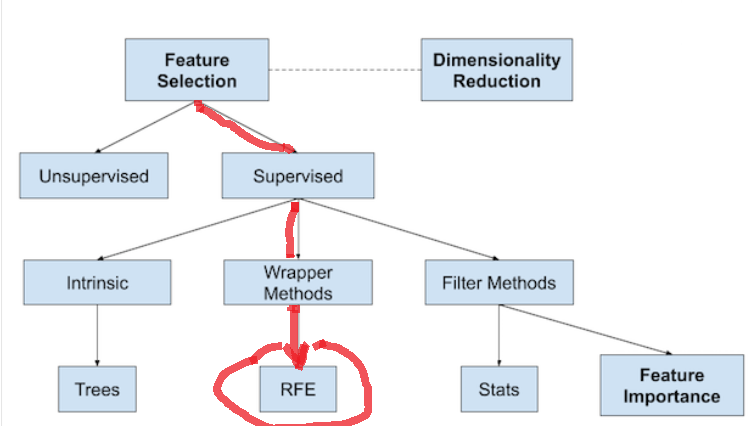


### 1. Recursive Feature Elimination - RFE 
The Recursive Feature Elemination (RFE) works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [ ]:
# EXECUTION TIME ---> 159 sec
# RFE
# The code block below uses RFE with the logistic regression algorithm to select the top 10 features. The choice of algorithm does not matter too much as long as it is skillful and consistent.

# Feature Extraction with RFE ------ (EXECUTED IN 154 sec )
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='liblinear')
rfe = RFE(model, 10)    # Choosing top 10
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

# RESULT - RUN 1
# -------------------------------------------------------------------------------------------
# Num Features: 10
# Selected Features: [False False False False False False False False False False False False
#  False False  True False False False False False False False False False
#  False False False False False False False False False False False False
#  False False False False False False False False False False False False
#   True False False False False False False False False False False False
#  False False False False  True False False False  True False False False
#  False False False False False False False  True False False False False
#  False False  True False False False False  True False False False  True
#  False False False False False False False False False False False False
#  False False False False False False False False False False False False
#  False False False False False False False False False False False False
#  False False False False  True False False False False False False False
#  False False False False False False False False  True False False False
#  False False False False False False False]
# Feature Ranking: [154 153 152  38  37  26  25  85  84  83  86  16  15  14   1  13 108  12
#  111 113 112 114 116  11 119 122   8 118 123 129 131 132 135 137 138  39
#  143 144 145 142   7 136  94  92  21  17 102  62   1   5 150 130  97  98
#  99  87  93 106  57   2 128  23 115  41   1  32  95  42   1  44  33 121
#   64  53  54  55  56  68 103   1  73  72 151  71 134  76   1   3 125 124
#   29   1 139 140  74   1 146 148 149 117 110  49  67  63  36  69  52  81
#   19  22  82 133 101 109  78   9  66  24  65  58  50 107  60  80  61  77
#   79   6 147 120  75 127 141 126 104  35   1  59  45  46  43  70  47  48
#  105 100  91  88  96  89  90  28   1  40  27  10   4  34  18  20  30  31
#   51]


# FROM THE RFE method the 10 best features are the 15th, 49th, 65th, 69th, 80th, 87th, 92nd, 96th, 137th, 153rd feature. 

# 153rd feature is our target feature 'class'

# RFE has selected the top 10 features and there are 9 input features and 1 target feature.



# TOP 10 FEATURES
# ---------------------------

# Input fetures
#----------------
# Feature 15th 
# Feature 49th 
# Feature 65th 
# Feature 69th 
# Feature 80th 
# Feature 87nd 
# Feature 92nd 
# Feature 96th 
# Feature 137th

# Target feture
#----------------
# Feature 153th

Num Features: 10
Selected Features: [False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False  True False
 False False False False False False False False False False False False
 False False False False False False False  True False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False  True  True False False  True False False False
 False False False False False False False False  True False False False
 False False Fa

### 2. Univariate Selection

When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square value indicates that the hypothesis of independence is incorrect. In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

In Python this type of filtration can be done by using SelectKBest and chi2 library from sklearn as in following code:

 

In [ ]:
# EXECUTION TIME ---> 0.6 sec
# UNIVARIATE SELECTION
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


#apply SelectKBest class to extract top 10 best features 
bestfeatures = SelectKBest(score_func=chi2, k=10) 
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data_changed.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1) 
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores
print(featureScores.nlargest(10,'Score'))  #print 10 best features

# RESULTS
# ----------------------------------------------
#                          Specs          Score
# 157                           5  231069.607542
# 155                           3  174525.937919
# 68               wlan.fc.pwrmgt   32124.682195
# 48   radiotap.channel.type.ofdm   28936.000138
# 64              wlan.fc.subtype   28321.490224
# 44            radiotap.datarate   24346.021809
# 152                           0   17976.845924
# 151                    data.len   13311.733744
# 47    radiotap.channel.type.cck   12317.666392
# 5                     frame.len   12076.290588

# Run it few times and was getting the same results

                          Specs          Score
157                           5  231069.607542
155                           3  174525.937919
68               wlan.fc.pwrmgt   32124.682195
48   radiotap.channel.type.ofdm   28936.000138
64              wlan.fc.subtype   28321.490224
44            radiotap.datarate   24346.021809
152                           0   17976.845924
151                    data.len   13311.733744
47    radiotap.channel.type.cck   12317.666392
5                     frame.len   12076.290588


### 3. Feature Importance
Feature importance is a kind of score for each feature in dataset, the higher the score more important or relevant is the feature towards for the result or dependent variable.

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

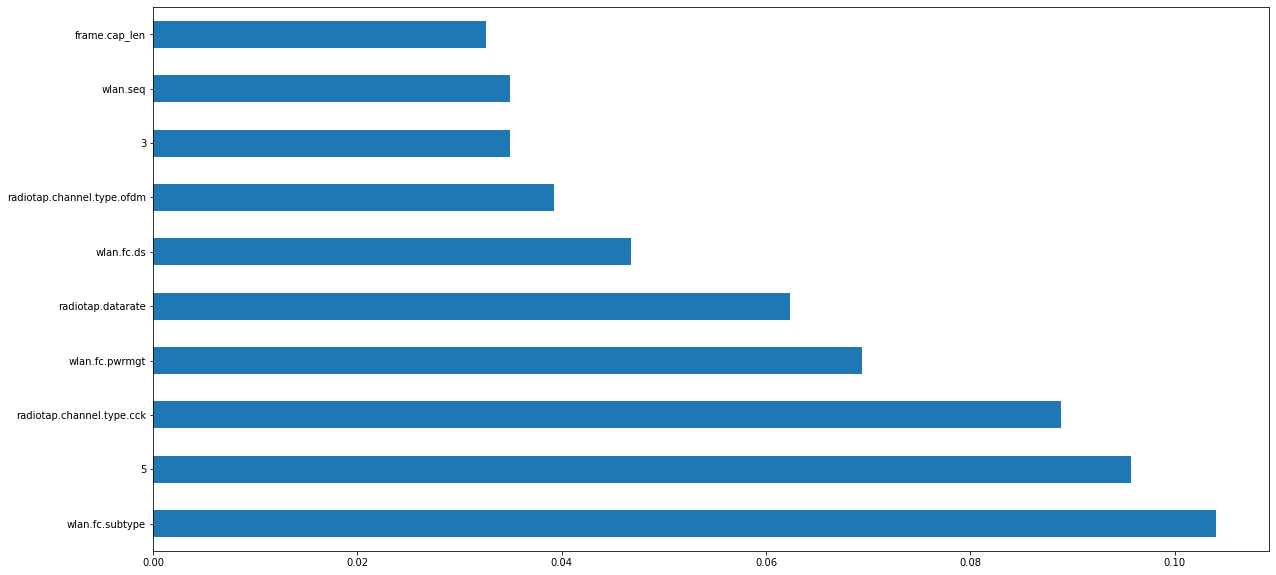

In [ ]:
# EXECUTION TIME ---> 5.3 sec
# Feature Importance using ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier 
import matplotlib.pyplot as plt 

model = ExtraTreesClassifier() 
model.fit(X,Y)

feat_importances = pd.Series(model.feature_importances_, index=names_changed) 
feat_importances.nlargest(10).plot(kind='barh',figsize=(20,10)) 


# RESULTS - RUN 1
# -------------------------------------------------
# 3(this is one of our new extracted features from the autoencoder), frame.cap_len, wlan.fc.ds, wlan.fc.protected, radiotap.datarate, radiotap.channel.type.cck, wlan.fc.pwrmgt, radiotap.channel.type.ofdm, wlan.fc.subtype, 5(this is one of our new extracted features from the autoencoder)

# RESULTS - RUN 2
# -------------------------------------------------
# wlan.fc.subtype, radiotap.datarate, radiotap.channel.type.ofdm, 5(this is one of our new extracted features from the autoencoder), wlan.fc.pwrmgt, radiotap.channel.type.cck, wlan.fc.ds, wlan.fc.protected, wlan.fc.type, 3(this is one of our new extracted features from the autoencoder)

# RESULTS - RUN 3
# -------------------------------------------------
# wlan.fc.subtype, radiotap.channel.type.cck, radiotap.channel.type.ofdm, wlan.fc.ds, 5(this is one of our new extracted features from the autoencoder), 3(this is one of our new extracted features from the autoencoder), radiotap.datarate, wlan.fc.protected, wlan.seq

# RESULTS - RUN 4
# -------------------------------------------------
# wlan.fc.subtype, wlan.fc.pwrmgt, 3(this is one of our new extracted features from the autoencoder), radiotap.channel.type.ofdm, wlan.fc.protected, radiotap.channel.type.cck, 5(this is one of our new extracted features from the autoencoder), radiotap.datarate, wlan.fc.ds, wlan.seq

# RESULTS - RUN 5
# -------------------------------------------------
# wlan.fc.subtype, 5(this is one of our new extracted features from the autoencoder), radiotap.channel.type.cck, wlan.fc.pwrmgt, radiotap.datarate, wlan.fc.ds, radiotap.channel.type.ofdm, 3(this is one of our new extracted features from the autoencoder), wlan.seq, frame.cap_len


# After 5 runs of the feture importance using ExtraTreesClassifier combining it with the reults of UNIVARIATE SELECTION and RFE selection we concluded that the top 10 features to select to use in our Classifier are:

# 1.  5(this is one of our new extracted features from the autoencoder)
# 2.  3(this is one of our new extracted features from the autoencoder)
# 3.  wlan.fc.subtype
# 4.  wlan.fc.ds
# 5.  wlan.fc.protected
# 6.  wlan.fc.pwemgt
# 7.  wlan.seq
# 8.  radiotap.datarate
# 9.  radiotap.channel.typ.cck
# 10. radiotap.channel.typ.cck

### TOP 10 FEATURES SELECTED
The 10 top features we are going to select after combining the results from all 3 Selection methods are:
<br>
<br>
1. 5(this is one of our new extracted features from the autoencoder)
<br>
2.  3(this is one of our new extracted features from the autoencoder)
<br>
3.  wlan.fc.subtype
<br>
4.  wlan.fc.ds
<br>
5.  wlan.fc.protected
<br>
6.  wlan.fc.pwrmgt
<br>
7.  wlan.seq
<br>
8.  radiotap.datarate
<br>
9.  radiotap.channel.type.cck
<br>
10. radiotap.channel.type.ofdm
<br>



### BUILD A NEW DATAFRAME WITH ONLY OUR 10 NEW SELECTED FEATURES AS INPUT FEATURES THE "CLASS" FEATURE AS OUR TARGET FEATURE
Our new dataframe is now stored in a dataframe called "selected_features" 

In [ ]:
# EXECUTION TIME ---> 0.5 sec
# Selecting the 10 new features for our dataset this will be temporary dataset as we will need to add the 'class' variable.
selected_features_temp = data_changed.filter(regex='5|3|wlan.fc.subtype|wlan.fc.ds|wlan.fc.protected|wlan.fc.pwrmgt|wlan.seq|radiotap.datarate|radiotap.channel.type.cck|radiotap.channel.type.ofdm')
del selected_features_temp['radiotap.channel.type.5ghz'] # Was addin this variable and I had to delete it.... Don't know why
selected_features_temp

# We will need also to add the column 'class' to our dataset at the end of the dataset as this is our target data.
class_variable = data.filter(regex='class')
class_variable

# OUR final dataframe with our 10 new selected features as input features and the 'class' feature as target feature
selected_features = pd.concat([selected_features_temp,class_variable], axis=1)
selected_features

,radiotap.datarate,radiotap.channel.type.cck,radiotap.channel.type.ofdm,wlan.fc.subtype,wlan.fc.ds,wlan.fc.pwrmgt,wlan.fc.protected,wlan.seq,3,5,class
0,0.88679,0,1,0.30769,0.5,1,0,0.946280,4.554670,8.928177,0
1,0.43396,0,1,1.00000,0.0,0,0,0.000000,5.592299,11.775085,0
2,0.00000,1,0,0.61538,0.0,0,0,0.255430,2.126843,8.038411,0
3,0.00000,1,0,0.61538,0.0,0,0,0.072772,0.621654,5.982293,0
4,0.00000,1,0,0.61538,0.0,0,0,0.256900,2.129890,8.114099,0
...,...,...,...,...,...,...,...,...,...,...,...
97039,0.00000,1,0,0.61538,0.0,0,0,0.217830,3.699366,10.317592,1
97040,0.00000,1,0,0.61538,0.0,0,0,0.218320,3.594585,10.663359,1
97041,0.00000,1,0,0.61538,0.0,0,0,0.218560,3.704146,10.206970,1
97042,0.00000,1,0,0.61538,0.0,0,0,0.218800,3.491013,10.940394,1


In [ ]:
# CREATE THE LIST WITH THE NEW VARIABLE NAMES
selected_features_names = []

for col_name in selected_features.columns: 
    #print(col_name)
    selected_features_names.append(col_name)

selected_features_names

# RESULTS
# ------------

# ['radiotap.datarate',
#  'radiotap.channel.type.cck',
#  'radiotap.channel.type.ofdm',
#  'wlan.fc.subtype',
#  'wlan.fc.ds',
#  'wlan.fc.pwrmgt',
#  'wlan.fc.protected',
#  'wlan.seq',
#  3,
#  5,
#  'class']

['radiotap.datarate',
 'radiotap.channel.type.cck',
 'radiotap.channel.type.ofdm',
 'wlan.fc.subtype',
 'wlan.fc.ds',
 'wlan.fc.pwrmgt',
 'wlan.fc.protected',
 'wlan.seq',
 3,
 5,
 'class']

# CHOOSING CLASSIFICATIONS METHOD
<br>
<br>
<br>
COMPARING MACHINE LEARNING ALGORITHMS

When you work on a machine learning project, you often end up with multiple good models to
choose from. Each model will have different performance characteristics. Using resampling
methods like cross-validation, you can get an estimate for how accurate each model may be on
unseen data. You need to be able to use these estimates to choose one or two best models from the
suite of models that you have created.
When you have a new dataset, it is a good idea to visualise the data using different techniques in
order to look at the data from different perspectives. The same idea applies to model selection. You
should use a number of different ways of looking at the estimated accuracy of your machine
learning algorithms in order to choose the one or two algorithm to finalise. A way to do this is to
use visualisation methods to show the average accuracy, variance and other properties of the
distribution of model accuracies. In this section you will discover exactly how you can do that in
Python with scikit-learn.
The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is
evaluated in the same way on the same data. You can achieve this by forcing each algorithm to be
evaluated on a consistent test harness. In the example below six different classification
algorithms are compared on a single dataset:
<br>
• Logistic Regression.
<br>
• Linear Discriminant Analysis.
<br>
• k-Nearest Neighbors.
<br>
• Classification and Regression Trees.
<br>
• Naive Bayes.
<br>
• Support Vector Machines.

The dataset is the Pima Indians onset of diabetes problem. The problem has two classes and eight
numeric input variables of varying scales. The 10-fold cross-validation procedure is used to
evaluate each algorithm, importantly configured with the same random seed to ensure that the same
splits to the training data are performed and that each algorithm is evaluated in precisely the same
way. Each algorithm is given a short name, useful for summarising results afterward.

LR: 0.969488 (0.001980)
LDA: 0.936462 (0.003193)
KNN: 0.996919 (0.000433)
CART: 0.996981 (0.000380)
NB: 0.950806 (0.005253)
SVM: 0.986264 (0.001301)


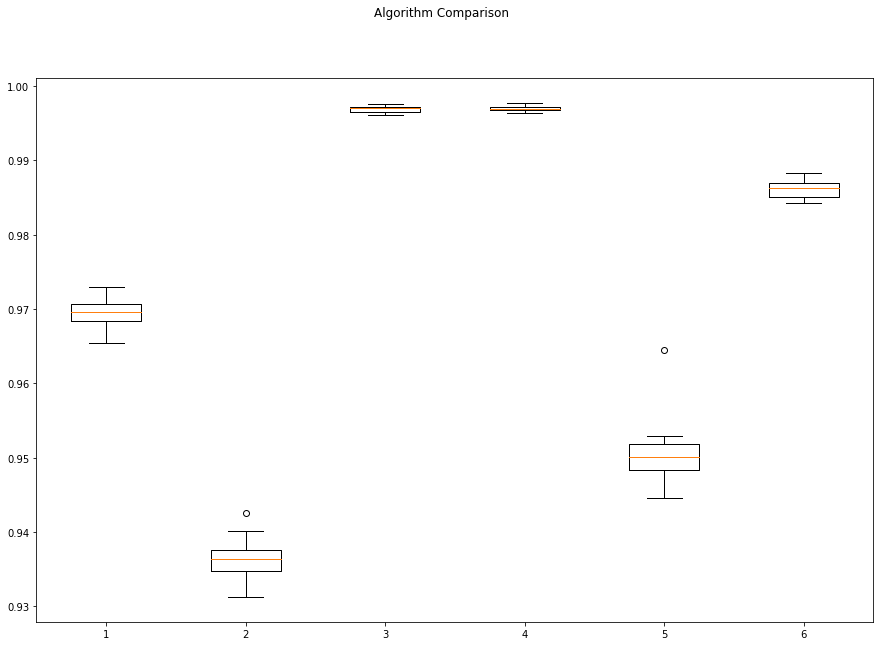

In [ ]:
# EXECUTION TIME ---> 843 sec
# Compare Algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# load dataset
f_array = selected_features.values
f_X = f_array[:,0:10]
f_Y = f_array[:,10]

# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = KFold(n_splits=10, random_state=7,shuffle=True)
 cv_results = cross_val_score(model, f_X, f_Y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax

# RESULTS
# ----------------

# LR: 0.969488 (0.001980)
# LDA: 0.936462 (0.003193)
# KNN: 0.996919 (0.000433)
# CART: 0.997022 (0.000395)
# NB: 0.950806 (0.005253)
# VSVM: 0.986264 (0.001301)


# We can see that the algorithm with the best accuracy and the least loss is the KNN and CART.

# K-NEAREST NEIGHBOUR (KNN)

KNN uses a distance metric to find the k most similar instances in
the training data for a new instance and takes the mean outcome of the neighbors as the prediction.
You can construct a KNN model using the KNeighboursClassifier class

In [ ]:
# EXECUTION TIME ---> 6.3 sec
# KNN Classification 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# load dataset
f_array = selected_features.values
f_X = f_array[:,0:10]
f_Y = f_array[:,10]

num_folds = 10
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = KNeighborsClassifier()
results = cross_val_score(model, f_X, f_Y, cv=kfold)
print(results.mean())

# 0.999295321752046

0.9969189259154966


### CONFUSION MATRIX FOR K-NEAREST NEIGHBOUR (KNN)

In [ ]:
# EXECUTION TIME ---> 0.9 sec
# Confusion matrix --- FOR KNN
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# load dataset
f_array = selected_features.values
f_X = f_array[:,0:10]
f_Y = f_array[:,10]

test_size = 0.1
seed = 7

# split into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(f_X, f_Y, test_size=test_size, random_state=seed)

# fit a model
num_folds = 10
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

print(confusion_matrix(Y_test,predicted))


# RESULT - EVALUATION MATRIX FOR CART
# ------------
# [[4885   19]
#  [  15 4786]]

# Checking in the confusion matrix:
# True Positive TP = 4885
# False Positive FP = 15
# True Negative TN = 4786
# False Negative FN = 19 

[[4885   19]
 [  15 4786]]


## EVALUATION AND ANALYSIS
The confusion matrix is commonly used to evaluate the performance of a ML model, particularly for binary classification which is the case in this study. Based on the confusion
matrix, the below evaluations measures are intended to give
information on the effectiveness and efficiency of the proposed algorithm. The evaluation measure used are accuracy
(Acc), detection rate (DR), false alarm rate (FAR), F-measure
(F1), Mathew’s correlation coefficient (Mcc) and Time To
Build (TTB) and can be calculated using the below equations.
<br>
<br>
Acc = TP + TN / TP + TN + FP + FN
<br>
DR (recall) = TP / TP + FN
<br>
Precision = TP / TP + FP
<br>
FAR = FP / TN + FP
<br>
FNR = FN / FN + TP
<br>
F1 = 2TP /  2TP + FP + FN
<br>
Mcc= (TP ∗ TN)−(FP ∗ FN) / √ (TP+FP) (TP+FN) (TN +FP) (TN +FN)
<br>
<br>
Checking in the confusion matrix: 
<br>
True Positive TP = 4885
<br>
False Positive FP = 15
<br>
True Negative TN = 4786
<br>
False Negative FN = 19
<br>
<br>
<br>
<br>
<br>


In [ ]:
# KNN
import math as mt
# We will calculate these evaluation metrics for the CART ALGORITHM
# True Positive 
TP = 4885
# False Positive 
FP = 15
# True Negative 
TN = 4786
# False Negative 
FN = 19

# Accuracy
Acc = (TP + TN )/ (TP + TN + FP + FN)
# Detection Rate
DR = TP / (TP + FN)
# Precision
Precision = TP / (TP + FP)
# False Alarm
FAR = FP / (TN + FP)
# Type error 2
FNR = FN / (FN + TP)
# F1
F1 = 2*TP / (2*TP + FP + FN)
# Matthews Correlation Coefficient
Mcc = ((TP*TN)-(FP*FN))/ mt.sqrt((TP+FP)*(TP+FN)*(TN +FP)*(TN +FN))

Acc, DR, Precision, FAR, FNR, F1, Mcc

# RESULTS
# -----------------------------------------------------------------------
# # Acc-Accuracy       DR-Detection Rate   Precision          FAR-False Alarm       FNR-Type error 2      F1                 Mcc-Matthews Correlation Coefficient
# (0.9964966512107162, 0.9961256117455138, 0.996938775510204, 0.003124349093938763, 0.003874388254486134, 0.996532027743778, 0.9929929118657552)

(0.9964966512107162,
 0.9961256117455138,
 0.996938775510204,
 0.003124349093938763,
 0.003874388254486134,
 0.996532027743778,
 0.9929929118657552)

# CLASSIFICATION AND REGRESSION TREES (CART or JUST DECISION TREES)

CART constructs a binary
tree from the training data. Split points are chosen greedily by evaluating each attribute and each
value of each attribute in the training data in order to minimize a cost function (like the Gini index).
You can construct a CART model using the DecisionTreeClassifier class

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4904
         1.0       1.00      1.00      1.00      4801

    accuracy                           1.00      9705
   macro avg       1.00      1.00      1.00      9705
weighted avg       1.00      1.00      1.00      9705



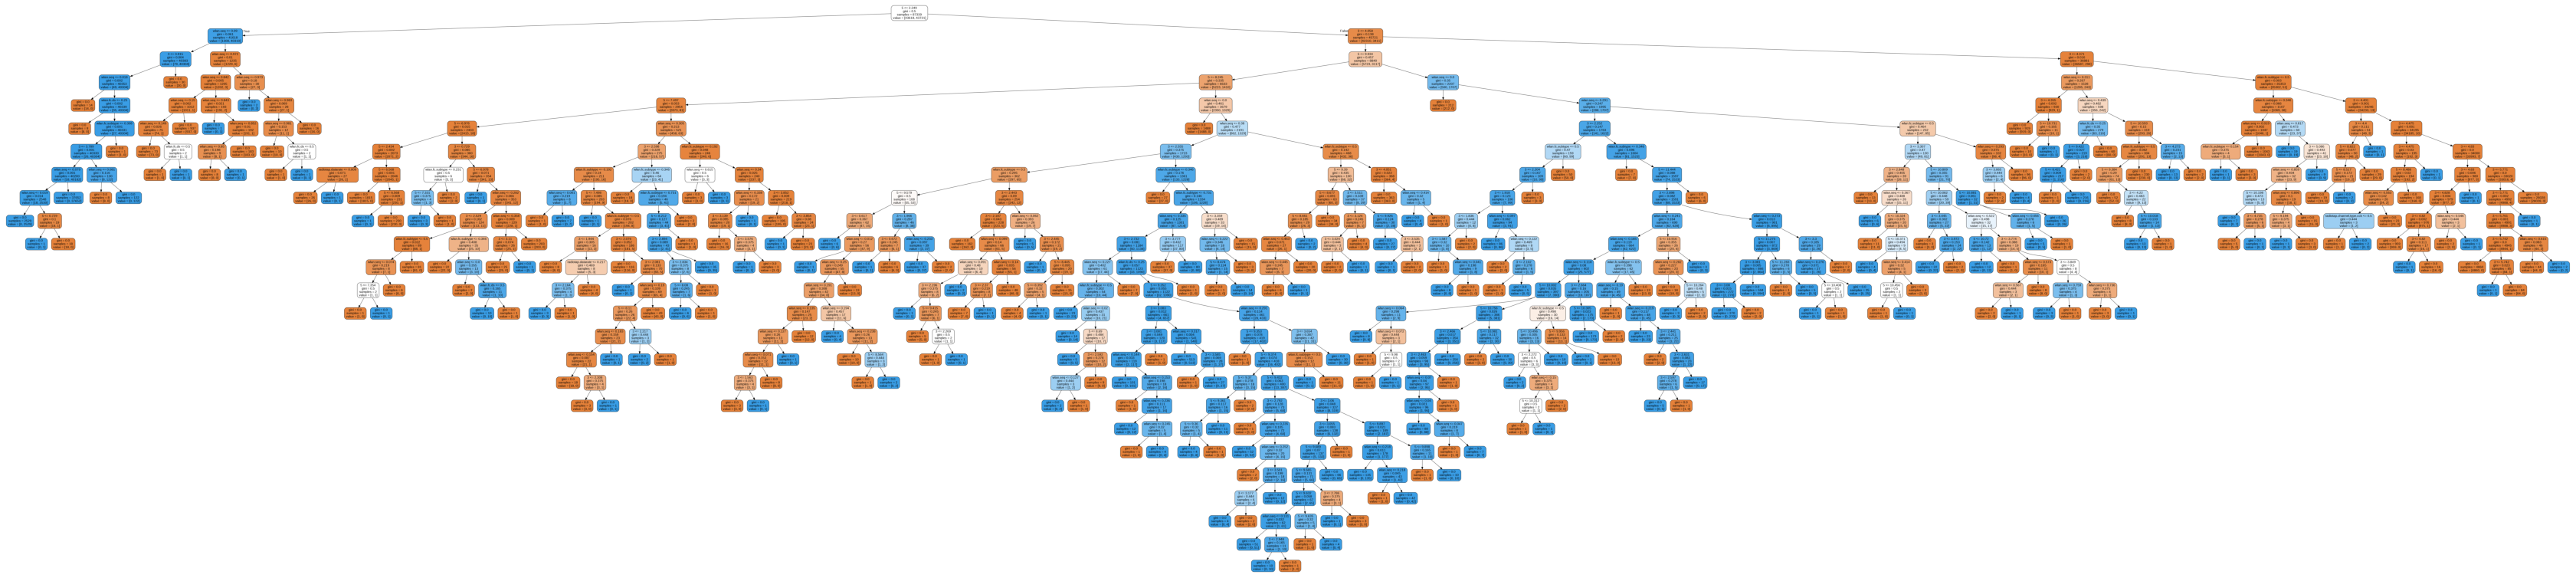

In [ ]:
# EXECUTION TIME ---> 6.3 sec
# CART Classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

# load dataset
f_array = selected_features.values
f_X = f_array[:,0:10]
f_Y = f_array[:,10]

test_size = 0.1
seed = 7

# split into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(f_X, f_Y, test_size=test_size, random_state=seed)

# fit a model
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

from sklearn.tree import export_graphviz
export_graphviz(
 model,
 out_file='pima_tree.dot',
 feature_names=selected_features_names[0:10],
 rounded=True,
 filled=True
 )

# convert .dot to .png
from subprocess import check_call
check_call(['dot','-Tpng','pima_tree.dot','-o','pima_tree.png'])

# if pydot is installed use the below
!dot -Tpng pima_tree.dot -o pima_tree.png -Gdpi-600

# display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (60, 20))
plt.imshow(plt.imread('pima_tree.png'))
plt.axis('off');
plt.show();

# Decision-tree learners can create over-complex trees that do not generalise the data well. This is
# called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum
# number of samples required at a leaf node or setting the maximum depth of the tree are necessary to
# avoid this problem.

### CONFUSION MATRIX FOR CART

In [ ]:
# EXECUTION TIME ---> 0.9 sec
# Confusion matrix --- FOR CART
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

# load dataset
f_array = selected_features.values
f_X = f_array[:,0:10]
f_Y = f_array[:,10]

test_size = 0.1
seed = 7

# split into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(f_X, f_Y, test_size=test_size, random_state=seed)

# fit a model
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

print(confusion_matrix(Y_test,predicted))

# RESULT - EVALUATION MATRIX FOR CART
# ------------
# [[4886   18]
#  [   13 4788]]

# Checking in the confusion matrix:
# True Positive TP = 4886
# False Positive FP = 13
# True Negative TN = 4788
# False Negative FN = 18 




[[4886   18]
 [  13 4788]]


## EVALUATION AND ANALYSIS
The confusion matrix is commonly used to evaluate the performance of a ML model, particularly for binary classification which is the case in this study. Based on the confusion
matrix, the below evaluations measures are intended to give
information on the effectiveness and efficiency of the proposed algorithm. The evaluation measure used are accuracy
(Acc), detection rate (DR), false alarm rate (FAR), F-measure
(F1), Mathew’s correlation coefficient (Mcc) and Time To
Build (TTB) and can be calculated using the below equations.

<br>
<br>
Acc = TP + TN / TP + TN + FP + FN
<br>
DR (recall) = TP / TP + FN
<br>
Precision = TP / TP + FP
<br>
FAR = FP / TN + FP
<br>
FNR = FN / FN + TP
<br>
F1 = 2TP /  2TP + FP + FN
<br>
Mcc= (TP ∗ TN)−(FP ∗ FN) / √ (TP+FP) (TP+FN) (TN +FP) (TN +FN)
<br>
<br>
Checking in the confusion matrix: 
<br>
True Positive TP = 4886
<br>
False Positive FP = 13
<br>
True Negative TN = 4788
<br>
False Negative FN = 18
<br>
<br>
<br>
<br>
<br>

In [ ]:
# CART
import math as mt
# We will calculate these evaluation metrics for the CART ALGORITHM
# True Positive 
TP = 4886
# False Positive 
FP = 13
# True Negative 
TN = 4788
# False Negative 
FN = 18

# Accuracy
Acc = (TP + TN )/ (TP + TN + FP + FN)
# Detection Rate
DR = TP / (TP + FN)
# Precision
Precision = TP / (TP + FP)
# False Alarm
FAR = FP / (TN + FP)
# Type error 2
FNR = FN / (FN + TP)
# F1
F1 = 2*TP / (2*TP + FP + FN)
# Matthews Correlation Coefficient
Mcc = ((TP*TN)-(FP*FN))/ mt.sqrt((TP+FP)*(TP+FN)*(TN +FP)*(TN +FN))

Acc, DR, Precision, FAR, FNR, F1, Mcc

# RESULT
# -----------------------------------------------------------------------------------------------------------------------------------------------

# Acc-Accuracy         DR-Detection Rate   Precision           FAR-False Alarm        FNR-Type error 2     F1                  Mcc-Matthews Correlation Coefficient

# KNN
# (0.9964966512107162, 0.9961256117455138, 0.996938775510204, 0.003124349093938763, 0.003874388254486134, 0.996532027743778, 539773361366385.5)

# CART
# (0.9968057702215353, 0.9963295269168027, 0.9973463972239233, 0.0027077692147469278, 0.00367047308319739, 0.9968377027440579, 0.9936114182331641)


(0.9968057702215353,
 0.9963295269168027,
 0.9973463972239233,
 0.0027077692147469278,
 0.00367047308319739,
 0.9968377027440579,
 0.9936114182331641)

# COMPARING THE 2 ALGORITHMS
From the confusin matrix results and the other Evaluation metrics we can see that CLASSIFICATION AND REGRESSION TREES (CART or JUST DECISION TREES) model performs slightly better thus we will pick CART as a classifier for our CYBER_THREAD_DETECTOR 

In [ ]:
# We will test this with our test dataset now. 
